<a href="https://colab.research.google.com/github/carlosrodriguesjf/analise-vendas-supermercado/blob/main/Segmenta%C3%A7%C3%A3o_de_clientes_de_um_supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Segmentação de Clientes em um Supermercado


In [1]:
# Versão da Linguagem Python
from platform import python_version
print(f'Versão da Linguagem Python Usada neste notebook: {python_version()}')

Versão da Linguagem Python Usada neste notebook: 3.10.12


In [2]:
#!pip install -q -U watermark

In [3]:
# Carregando os pacotes

# Manipulação e visualização de dados
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Formatação de Gráficos
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15, 6))
%matplotlib inline

<Figure size 1500x600 with 0 Axes>

In [4]:
# Versões dos pacotes usados nesse projeto
%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.7.1
sklearn   : 1.2.2
numpy     : 1.22.4



## Supermart Grocery Sales - conjunto de dados de análise de varejo
Dados sobre pedidos feitos por clientes em um aplicativo de supermercado
Imagem de capa

Sobre o conjunto de dados
Este é um conjunto de dados fictício criado para ajudar os analistas de dados a praticar a análise exploratória de dados e a visualização de dados. O conjunto de dados contém dados sobre pedidos feitos por clientes em um aplicativo de entrega de supermercado.

O conjunto de dados foi projetado com a suposição de que os pedidos são feitos por clientes que vivem no estado de Tamil Nadu, na Índia.

Author do dataset: MOHAMED HARRIS

In [5]:
# Carregando os dados
df_supermarket = pd.read_csv("/content/drive/MyDrive/Datasets/Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

In [6]:
# Shape
df_supermarket.shape

(9994, 11)

In [7]:
# Visualizando os dados
df_supermarket.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [8]:
# Verificando o total de valores únicos por coluna
df_supermarket.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

In [9]:
# Verificando os tipos dos dados
df_supermarket.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [10]:
# Resumo estatístico das colunas numéricas
df_supermarket.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [11]:
# Verificando os tipos dos dados originais
df_supermarket.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [12]:
# Alterando as configurações para mostrar todas as colunas
pd.options.display.max_rows = 20
pd.options.display.max_columns = 60

In [13]:
# Criando e visualizando o resultado do pivot
df_supermarket_pivot = df_supermarket.pivot_table(index =['Customer Name'], columns=['Sub Category'], values='Sales',fill_value=0)
df_supermarket_pivot = df_supermarket_pivot.reset_index()
df_supermarket_pivot

Sub Category,Customer Name,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,Fish,Fresh Fruits,Fresh Vegetables,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices
0,Adavan,1292.875000,1361.800000,1417.583333,1412.571429,1539.000000,1574.307692,1602.727273,1542.000000,1451.250000,1547.666667,1332.285714,1435.625000,1750.500000,1726.214286,1554.571429,1910.400000,1542.307692,1551.000000,1973.200000,1731.900000,1486.666667,1581.500000,1361.941176
1,Aditi,1631.500000,2013.428571,1380.250000,1690.142857,1735.000000,1739.272727,1719.800000,1637.875000,1551.857143,2046.750000,1773.666667,1460.333333,1337.142857,1527.533333,1768.142857,1848.571429,862.400000,1508.555556,1353.888889,1725.833333,2112.000000,1471.833333,1487.166667
2,Akash,1536.000000,1395.714286,1638.090909,1479.000000,1398.909091,2059.250000,1724.333333,1595.500000,1476.428571,1678.222222,2089.750000,1270.857143,1628.500000,1678.000000,1412.285714,1228.571429,1404.600000,1748.500000,1981.000000,2177.500000,1620.200000,1515.800000,1511.333333
3,Alan,1523.750000,1426.666667,1472.500000,1594.000000,2016.600000,864.000000,1467.473684,1283.727273,1517.666667,1377.333333,1526.200000,1791.000000,1688.400000,1593.700000,1833.714286,1231.500000,1768.428571,1266.250000,1583.900000,1154.000000,1676.363636,1331.307692,1290.500000
4,Amrish,1565.111111,1567.529412,1540.533333,1408.300000,1738.500000,1609.000000,1515.500000,1504.615385,1846.333333,1725.000000,1150.166667,1311.181818,1570.777778,1351.894737,1038.000000,1709.750000,1555.764706,1595.166667,1343.857143,1609.000000,1464.000000,1302.384615,1305.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Vince,1699.857143,1488.333333,1736.636364,1350.222222,1122.300000,1886.375000,1448.375000,1623.571429,1362.500000,1952.500000,1507.444444,1456.333333,1880.500000,1406.625000,1784.888889,1032.444444,1842.142857,1524.400000,1560.833333,1476.571429,1274.666667,1476.818182,1296.200000
46,Vinne,1378.300000,1219.444444,1516.000000,1392.571429,1614.166667,1528.615385,1526.571429,1173.800000,1653.800000,1562.937500,1559.857143,1615.666667,1606.666667,1395.545455,1993.545455,1867.777778,1771.461538,1899.750000,1349.454545,1473.111111,1866.666667,1609.833333,1765.888889
47,Willams,1618.666667,1481.000000,1788.777778,1717.666667,1329.166667,1488.714286,1343.428571,1657.444444,1470.571429,1214.250000,1311.500000,1594.500000,1539.750000,1542.764706,1448.250000,1507.818182,1083.000000,1546.500000,1892.000000,948.857143,1278.000000,1679.789474,1751.714286
48,Yadav,1284.600000,1271.600000,1682.363636,1884.833333,1161.500000,1415.727273,1758.666667,1344.250000,1494.000000,1336.333333,1538.636364,1697.875000,1401.285714,1575.375000,1139.375000,1221.666667,1577.285714,1403.428571,1336.250000,1676.555556,1724.000000,1327.434783,1738.571429


In [14]:
df_supermarket_pivot.describe()

Sub Category,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,Fish,Fresh Fruits,Fresh Vegetables,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1524.574034,1484.515490,1484.367087,1526.181902,1517.999466,1472.978409,1491.993172,1513.204472,1495.560182,1531.355778,1534.132210,1483.825084,1458.916445,1464.259835,1521.894210,1556.576012,1474.463984,1432.330631,1502.294382,1525.295732,1486.719867,1514.684950,1501.314436
std,216.732441,217.874308,158.087800,187.893729,251.963197,229.850973,159.018536,292.728770,159.771975,211.623009,203.460141,300.338530,291.705155,170.152147,225.208068,253.761728,238.839931,263.044583,220.483775,289.652453,314.225658,159.873550,189.310294
min,1155.666667,752.000000,1106.750000,1089.500000,1043.571429,864.000000,1160.900000,651.000000,1215.375000,983.000000,1094.333333,0.000000,0.000000,1127.666667,1038.000000,1032.444444,862.400000,765.333333,1013.666667,818.250000,0.000000,1199.571429,1096.800000
25%,1371.413462,1377.875000,1398.106250,1394.655844,1331.583333,1344.886364,1388.625000,1331.488095,1358.439286,1393.522321,1430.217857,1362.946023,1332.685714,1343.983173,1352.737500,1336.961364,1321.763636,1257.232143,1350.563131,1361.650000,1353.244444,1414.542411,1364.497549
50%,1499.577778,1480.785714,1484.416667,1506.000000,1506.777778,1467.000000,1491.042735,1549.888889,1496.437500,1521.361111,1514.983333,1489.461538,1511.658730,1464.057692,1446.458333,1562.800000,1491.700000,1443.089286,1497.566667,1544.350000,1489.404762,1525.844444,1488.541667
75%,1629.750000,1588.141667,1565.031250,1670.023810,1709.300000,1587.295673,1574.151515,1657.486111,1617.533333,1646.133333,1612.865385,1676.375000,1627.829545,1572.156250,1678.738636,1746.381944,1630.064286,1574.333333,1584.510714,1680.078571,1660.413636,1605.687500,1605.634375
max,2124.857143,2013.428571,1824.000000,1888.571429,2216.500000,2059.250000,1790.250000,2153.000000,1882.800000,2046.750000,2151.333333,2043.333333,1914.333333,1860.285714,2075.000000,2046.500000,1900.000000,2034.833333,2160.666667,2462.000000,2112.000000,1882.900000,2022.400000


In [15]:
# Verificando se existem valores nulos
df_supermarket_pivot.isnull().sum()

Sub Category
Customer Name         0
Atta & Flour          0
Biscuits              0
Breads & Buns         0
Cakes                 0
                     ..
Organic Staples       0
Organic Vegetables    0
Rice                  0
Soft Drinks           0
Spices                0
Length: 24, dtype: int64

In [16]:
df_supermarket

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [17]:
# Incluindo a cidade
df_supermarket_pivot2 =  df_supermarket_pivot.merge(df_supermarket[['Customer Name','Order Date','City']])
df_supermarket_pivot2

,Customer Name,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,Fish,Fresh Fruits,Fresh Vegetables,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices,Order Date,City
0,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,06-09-2015,Dharmapuri
1,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,8/29/2017,Coimbatore
2,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,09-08-2015,Bodi
3,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,06-04-2017,Bodi
4,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,12-09-2018,Dharmapuri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,03-08-2017,Pudukottai
9990,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,12-01-2018,Virudhunagar
9991,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,11-05-2015,Ramanadhapuram
9992,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,9/24/2018,Madurai


In [18]:
df_supermarket_pivot2

,Customer Name,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,Fish,Fresh Fruits,Fresh Vegetables,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices,Order Date,City
0,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,06-09-2015,Dharmapuri
1,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,8/29/2017,Coimbatore
2,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,09-08-2015,Bodi
3,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,06-04-2017,Bodi
4,Adavan,1292.875000,1361.8,1417.583333,1412.571429,1539.00,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.500,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.200000,1731.9,1486.666667,1581.5,1361.941176,12-09-2018,Dharmapuri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,03-08-2017,Pudukottai
9990,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,12-01-2018,Virudhunagar
9991,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,11-05-2015,Ramanadhapuram
9992,Yusuf,1489.777778,1396.7,1106.750000,1827.142857,1928.75,1485.352941,1296.454545,2153.0,1439.25,1843.181818,1587.000000,1676.500,1750.125,1303.727273,1370.200000,1406.0,1315.818182,1117.5,1397.285714,1539.0,1715.500000,1464.8,1711.454545,9/24/2018,Madurai


In [19]:
df_supermarket.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [20]:
df_supermarket_pivot.columns

Index(['Customer Name', 'Atta & Flour', 'Biscuits', 'Breads & Buns', 'Cakes',
       'Chicken', 'Chocolates', 'Cookies', 'Dals & Pulses',
       'Edible Oil & Ghee', 'Eggs', 'Fish', 'Fresh Fruits', 'Fresh Vegetables',
       'Health Drinks', 'Masalas', 'Mutton', 'Noodles', 'Organic Fruits',
       'Organic Staples', 'Organic Vegetables', 'Rice', 'Soft Drinks',
       'Spices'],
      dtype='object', name='Sub Category')

In [21]:
df_supermarket

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [22]:
# Verificamos que a coluna de data tem formatos diferente. Portanto vamos padronizar o formato
df_supermarket['Order Date'] = pd.to_datetime(df_supermarket['Order Date']).astype(str)
df_supermarket['Order Date'] = df_supermarket['Order Date'].apply(lambda x: time.strftime("%d/%m/%Y", time.strptime(x, "%Y-%m-%d")))
df_supermarket

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08/11/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08/11/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12/06/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11/10/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11/10/2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24/12/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12/07/2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06/06/2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16/10/2018,West,1659,0.15,597.24,Tamil Nadu


In [25]:
# Verificamos que a coluna de data tem formatos diferente. Padronizando o formato
df_supermarket['Order Date'] = pd.to_datetime(df_supermarket['Order Date']).astype(str)
df_supermarket['Order Date'] = df_supermarket['Order Date'].apply(lambda x: time.strftime("%d/%m/%Y", time.strptime(x, "%Y-%m-%d")))
df_supermarket


<ipython-input-25-654a35b6584b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_supermarket['Order Date'] = pd.to_datetime(df_supermarket['Order Date']).astype(str)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/08/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/08/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24/12/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07/12/2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06/06/2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16/10/2018,West,1659,0.15,597.24,Tamil Nadu


In [27]:
df_supermarket_pivot2 = df_supermarket_pivot2.reset_index()
df_supermarket_pivot2

In [31]:
df_supermarket_pivot2.head(5)

,index,Customer Name,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,Fish,Fresh Fruits,Fresh Vegetables,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices,Order Date,City
0,0,Adavan,1292.875,1361.8,1417.583333,1412.571429,1539.0,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.5,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.2,1731.9,1486.666667,1581.5,1361.941176,2017-08-11,Dharmapuri
1,1,Adavan,1292.875,1361.8,1417.583333,1412.571429,1539.0,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.5,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.2,1731.9,1486.666667,1581.5,1361.941176,2017-08-11,Coimbatore
2,2,Adavan,1292.875,1361.8,1417.583333,1412.571429,1539.0,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.5,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.2,1731.9,1486.666667,1581.5,1361.941176,2017-12-06,Bodi
3,3,Adavan,1292.875,1361.8,1417.583333,1412.571429,1539.0,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.5,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.2,1731.9,1486.666667,1581.5,1361.941176,2016-11-10,Bodi
4,4,Adavan,1292.875,1361.8,1417.583333,1412.571429,1539.0,1574.307692,1602.727273,1542.0,1451.25,1547.666667,1332.285714,1435.625,1750.5,1726.214286,1554.571429,1910.4,1542.307692,1551.0,1973.2,1731.9,1486.666667,1581.5,1361.941176,2016-11-10,Dharmapuri


In [34]:
df = df_supermarket_pivot2

## Análise Desscritiva

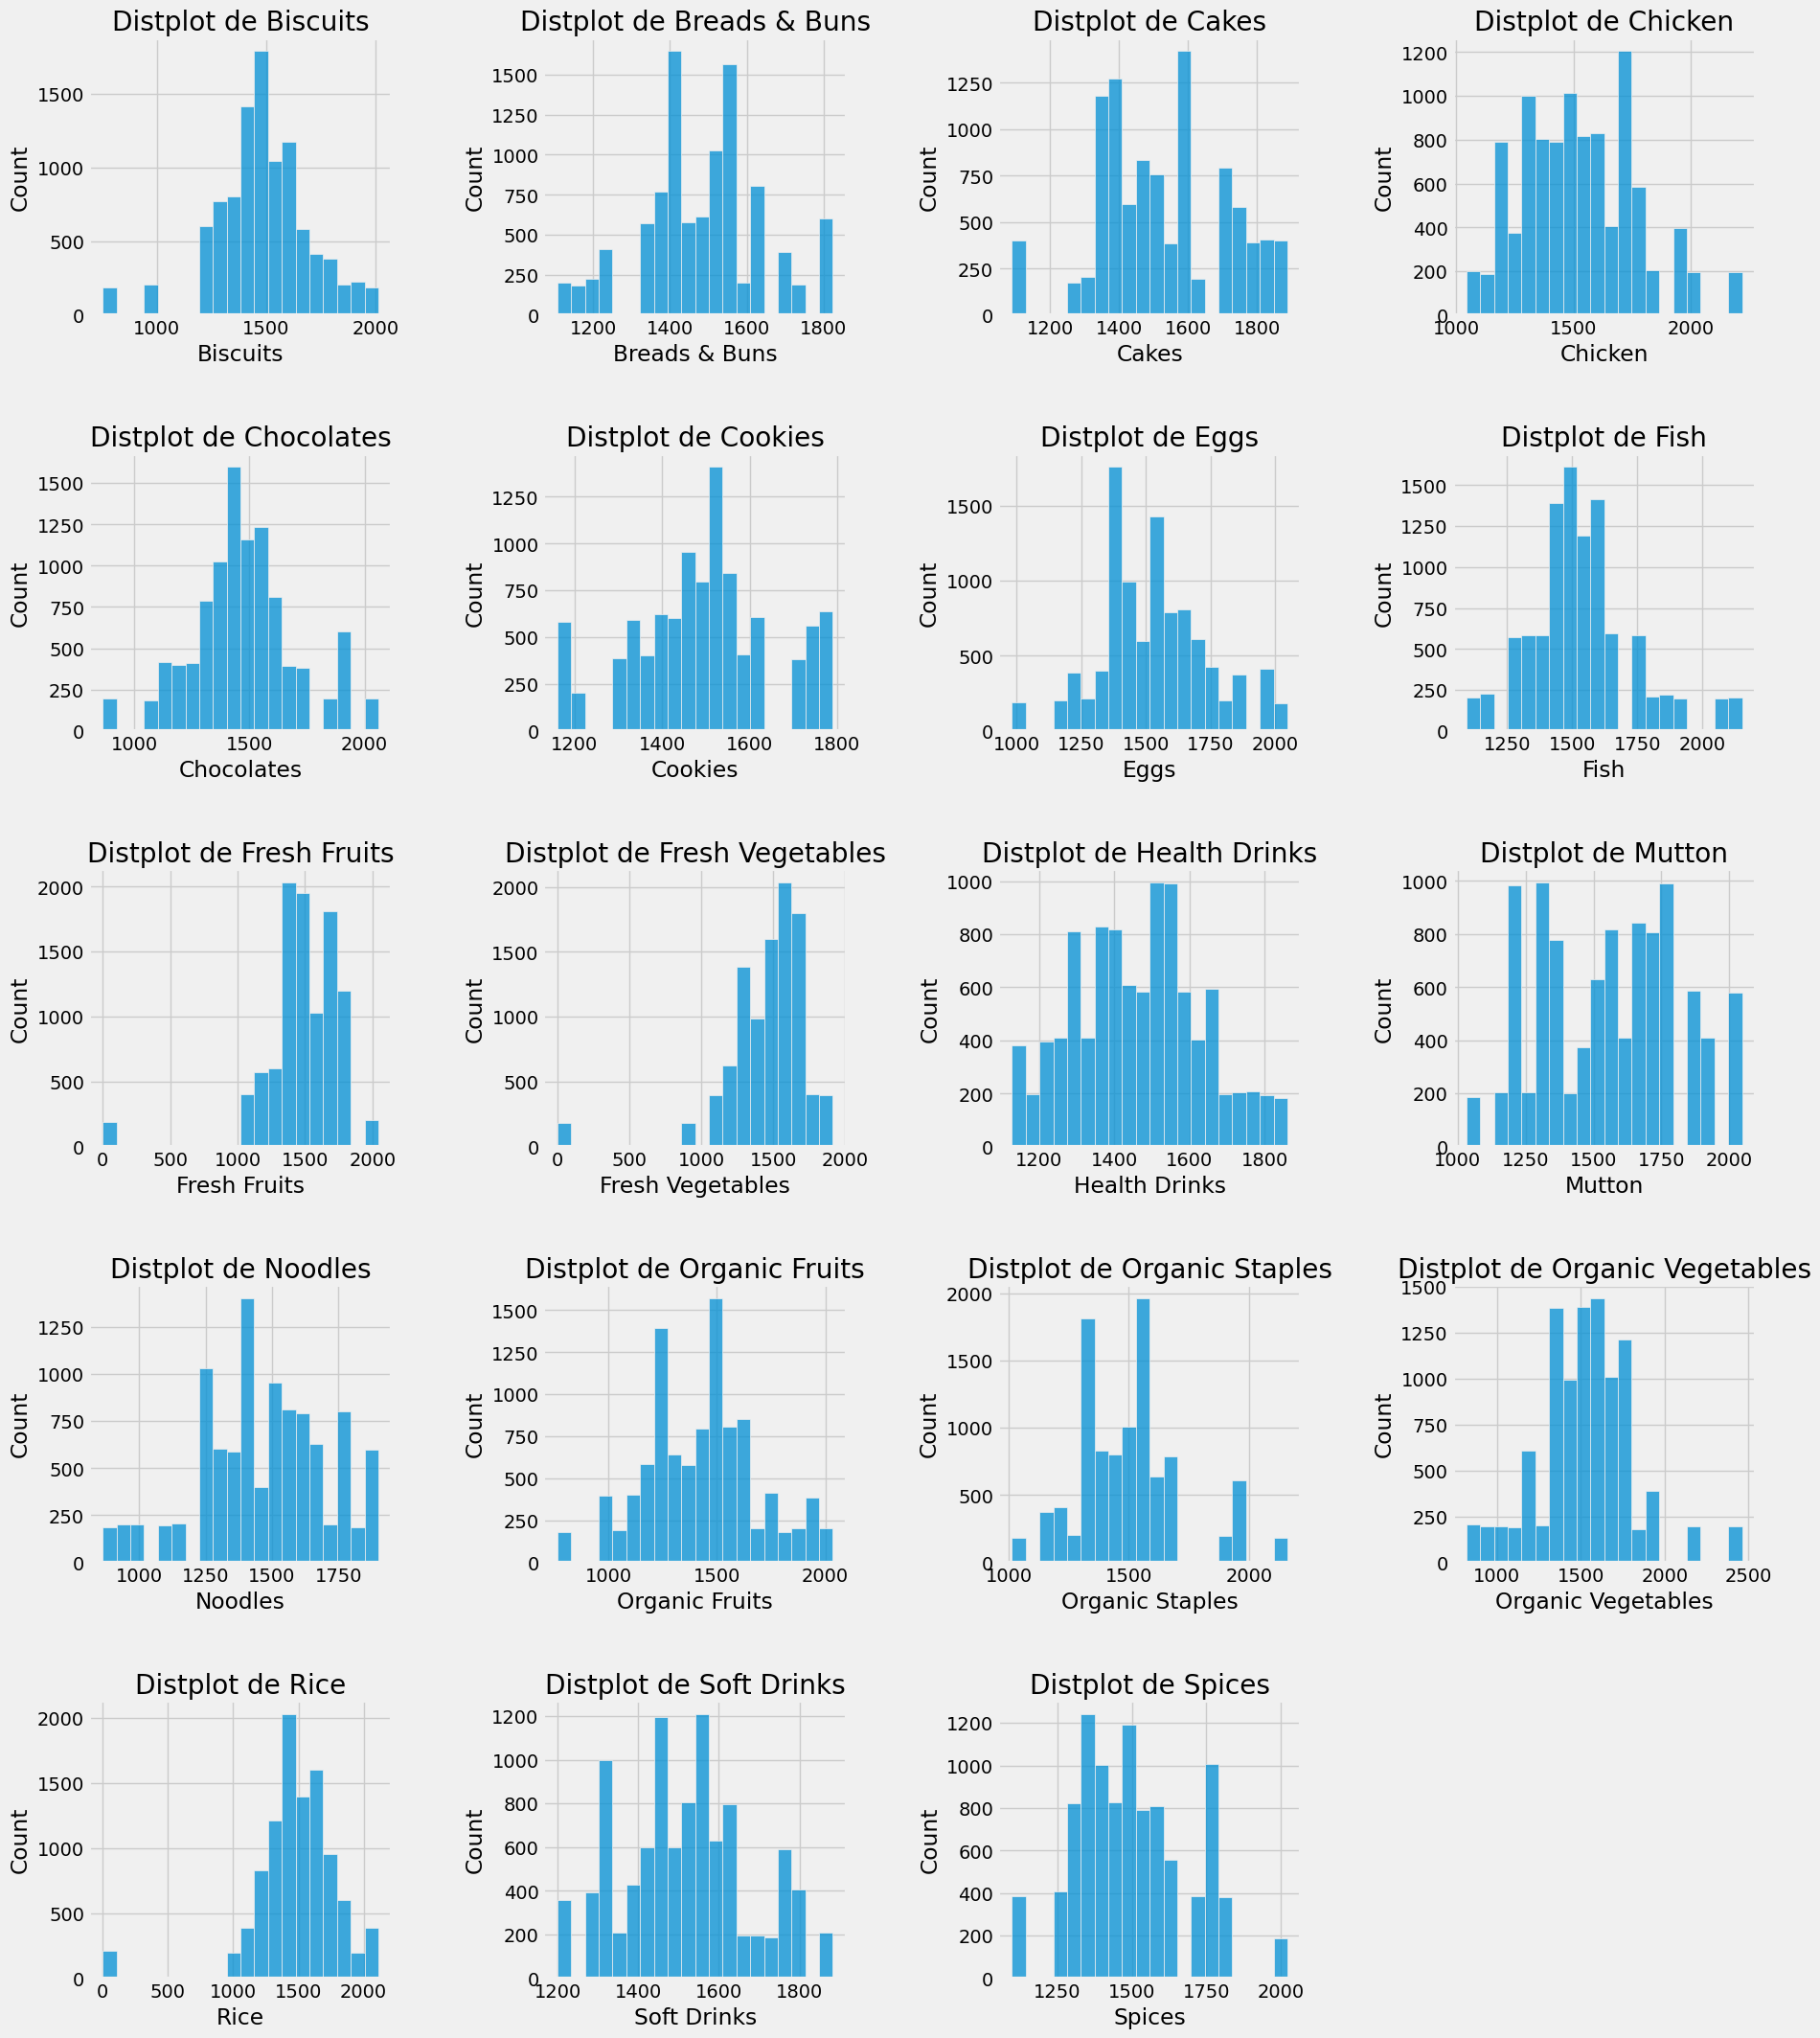

In [59]:
# Distplot dos atributos usados para a segmentação

# Tamanho da figura
plt.figure(1, figsize=(20,25))

# Inicializa o contador
n = 0

# Loop pelas colunas
for x in ['Biscuits', 'Breads & Buns',
       'Cakes', 'Chicken', 'Chocolates', 'Cookies', 'Eggs', 'Fish', 'Fresh Fruits', 'Fresh Vegetables','Health Drinks',
        'Mutton', 'Noodles', 'Organic Fruits','Organic Staples', 'Organic Vegetables', 'Rice', 'Soft Drinks','Spices']:
  n += 1
  plt.subplot(5, 4, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.histplot(df[x], bins = 20)
  plt.title('Distplot de {}'.format(x))
plt.show()